In [4]:
'''Importing the requried libraries and modules '''
import os
import pandas as pd
import numpy as np
import requests
import json 
import tweepy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display


#  Gathering the data

####  - Getting and saving `image_predictions.tsv` from the Udicity servers


In [5]:
if 'image_predictions.tsv' not in os.listdir():
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    dum = requests.get(url)
    content = dum.content
    with open(r'image_predictions.tsv','wb') as f:
        f.write(content) 


#### - Reading `twitter-archive-enhanced.csv` and `image_predictions.tsv`

In [6]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv' , sep ='\t')

### Define
- Retreiving the tweets'data through tweepy ,  reading `tweet-json-copy.txt` , and making Pandas DataFrame from the json objects

### Code

In [7]:
# creating an API object to gather Twitter data.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# Reading 'tweet-json-copy.txt' 
json_tweets = []
with open('tweet-json-copy.txt', 'r') as f:
    file = f.read()
    #file = file.replace('\n', '')
    file = file.splitlines()

for obje in file :
    json_tweets.append(json.loads(obje))

In [9]:
# Making Pandas DataFrame from the json objects
tweet_id = []
fav_count = []
retweet_count = []
for JObj in json_tweets :
    tweet_id.append(JObj['id_str'])
    fav_count.append(JObj['favorite_count'])
    retweet_count.append(JObj['retweet_count'])
dic = {'id' : tweet_id , 'favorite_count' : fav_count , 'retweet_count' : retweet_count}
tweet_df = pd.DataFrame(dic)

### Test

In [10]:
tweet_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assessing the data

In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [12]:
tweet_df[tweet_df['id'].duplicated() == True ]

,id,favorite_count,retweet_count


In [13]:
#tweet_df.head()
#tweet_df.tail(10)
tweet_df.sample(5)

,id,favorite_count,retweet_count
98,872967104147763200,28031,5669
2325,666407126856765440,113,44
147,863427515083354112,2363,105
1699,680940246314430465,3544,1225
1522,690597161306841088,2163,681


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#image_predictions.head(20)
image_predictions.sample(20)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
873,697995514407682048,https://pbs.twimg.com/media/Ca_HN8UWEAEB-ga.jpg,1,Staffordshire_bullterrier,0.280222,True,Boston_bull,0.161478,True,American_Staffordshire_terrier,0.126884,True
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
273,670832455012716544,https://pbs.twimg.com/media/CU9GjzrUkAAWPh4.jpg,1,malinois,0.317607,True,Norwegian_elkhound,0.274901,True,bathing_cap,0.114643,False
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
377,673213039743795200,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,1,schipperke,0.888082,True,groenendael,0.047727,True,kelpie,0.041398,True
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True


In [16]:
image_predictions[image_predictions['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [17]:
image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                       

In [18]:
image_predictions[image_predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
len(twitter_archive[twitter_archive['tweet_id'].duplicated() == False])

2356

In [22]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
len(twitter_archive[twitter_archive['tweet_id'].duplicated() == False])

2356

In [24]:
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
twitter_archive[twitter_archive['retweeted_status_timestamp'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [26]:
tweet_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Qulaity Issues


## `twitter_archive`

#### `tweet_id` is int , `id`is string(can't merge the datasets)
#### - `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id` are float , and not complete.
#### -`retweeted_status_timestamp` and `timestamp` are string.
#### -`retweeted_status_timestamp` is not complete.
#### - `rating_denominator` is changing from 10. 
#### - some pictures are for other animals , not dogs
#### - many data are NaN
#### - unecessary data of retweets
 


## `image_predictions`




#### - there are 2075 entries instead of 2356
#### - 66 duplicate `jpg_url`entries 


## Tidiness Issues


#### - drop unnecessary columns. i.e. retweet columns
#### - reduce four type columns `doggo` , `floofer` , `pupper`, and `puppo` into one column : `type`
####  -  Merge the three dataframes together







..

..

# Cleaning the data

### Define 
- making copy of the dataset in order to clean them 


### Code

In [27]:
tweet_json_clean = tweet_df.copy()
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()

### Verify

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Define
- Remove the 181 values columns of retweets

### Code

In [29]:
# Removing the 181 values columns of retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

### Test

In [30]:
# Verifying the change
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define
- convert only not NAN entries form float to string

### Code

In [31]:
# convert only not NAN entries form float to string
twitter_archive_clean.in_reply_to_status_id[twitter_archive_clean.in_reply_to_status_id.notnull()] = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean.in_reply_to_user_id[twitter_archive_clean.in_reply_to_user_id.notnull()] = twitter_archive_clean.in_reply_to_user_id.astype(str)


### Test

In [32]:
# Verifying the change
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(12)

### Define 
- changing timestamp  from string to datetime 

### Code

In [33]:
#changing timestamp  from string to datetime 
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [34]:
# verify
twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Define 
- Correcting denumerator

### Code

In [35]:
# set twitter_archive.timestamp = 10 as it should be
twitter_archive_clean.rating_denominator = 10

### Test

In [36]:
# verify
twitter_archive_clean.describe()

,tweet_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,0.0,0.0,2175.000000,2175.0
mean,7.371205e+17,NaN,NaN,13.215172,10.0
std,6.748668e+16,NaN,NaN,47.725696,0.0
min,6.660209e+17,NaN,NaN,0.000000,10.0
25%,6.768432e+17,NaN,NaN,10.000000,10.0
50%,7.098528e+17,NaN,NaN,11.000000,10.0
75%,7.894226e+17,NaN,NaN,12.000000,10.0
max,8.924206e+17,NaN,NaN,1776.000000,10.0


### Define 
- drop unnecessary retweet columns

### Code

In [37]:
# drop unnecessary retweet columns
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', 1)       
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_user_id', 1)     
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_timestamp', 1)

### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 254.9+ KB


### Define
- Melting four columns into one variable 'type'

### Code

In [39]:
# Determining id_vars, value_vars
columns = list(twitter_archive_clean)
keeped_cols= columns[:-4]
melt_cols= columns[-4:]
print(keeped_cols)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name']


In [40]:
# melt the the columns of dog types into values
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = keeped_cols, value_vars = melt_cols, 
                         var_name = 'type', value_name = 'dog_type')
# drop column 'type'
twitter_archive_clean = twitter_archive_clean.drop('type', 1)


### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id                 8700 non-null int64
in_reply_to_status_id    312 non-null object
in_reply_to_user_id      312 non-null object
timestamp                8700 non-null datetime64[ns]
source                   8700 non-null object
text                     8700 non-null object
expanded_urls            8468 non-null object
rating_numerator         8700 non-null int64
rating_denominator       8700 non-null int64
name                     8700 non-null object
dog_type                 8700 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 747.7+ KB


### Define
- Drop the duplicated entreies

### Code

In [42]:
twitter_archive_clean[twitter_archive_clean.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2175,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
2176,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2177,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
2178,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
2179,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
2180,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
2181,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
2182,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
2183,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
2185,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None


In [43]:
# drop the duplicates
twitter_archive_clean = twitter_archive_clean.drop_duplicates()


### Test

In [44]:
print(twitter_archive_clean.dog_type.value_counts())

None       2175
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_type, dtype: int64


### Define
- Merging the datasets

### Code

In [45]:
# Start Merging the first 2 datasets
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 22 columns):
tweet_id                 2311 non-null int64
in_reply_to_status_id    27 non-null object
in_reply_to_user_id      27 non-null object
timestamp                2311 non-null datetime64[ns]
source                   2311 non-null object
text                     2311 non-null object
expanded_urls            2311 non-null object
rating_numerator         2311 non-null int64
rating_denominator       2311 non-null int64
name                     2311 non-null object
dog_type                 2311 non-null object
jpg_url                  2311 non-null object
img_num                  2311 non-null int64
p1                       2311 non-null object
p1_conf                  2311 non-null float64
p1_dog                   2311 non-null bool
p2                       2311 non-null object
p2_conf                  2311 non-null float64
p2_dog                   2311 non-null bool
p3                   

### Define
- Changing `id` to `tweet_id`
- changing `tweet_id` from int to str
- merging the rest of the datasets

### Code

In [47]:
# chnaging 'id' series name in order to merge all datasets together
tweet_json_clean.rename(columns={'id':'tweet_id'} ,inplace = True)

In [48]:
# changing 'tweet_id' from int to str
twitter_archive_clean.tweet_id[twitter_archive_clean.tweet_id.notnull()] = twitter_archive_clean.tweet_id.astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
# Merge all datasets
twitter_archive_clean = twitter_archive_clean.merge(tweet_json_clean, on='tweet_id', how='inner')

### Test

In [50]:
# confirm changes
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 24 columns):
tweet_id                 2311 non-null object
in_reply_to_status_id    27 non-null object
in_reply_to_user_id      27 non-null object
timestamp                2311 non-null datetime64[ns]
source                   2311 non-null object
text                     2311 non-null object
expanded_urls            2311 non-null object
rating_numerator         2311 non-null int64
rating_denominator       2311 non-null int64
name                     2311 non-null object
dog_type                 2311 non-null object
jpg_url                  2311 non-null object
img_num                  2311 non-null int64
p1                       2311 non-null object
p1_conf                  2311 non-null float64
p1_dog                   2311 non-null bool
p2                       2311 non-null object
p2_conf                  2311 non-null float64
p2_dog                   2311 non-null bool
p3                  

### Define
- Drop the `rating_numerator`, `rating_denominator`, and use `rating`

### Code

In [51]:
# creating a 'rating' column instead of the num and denom columns
twitter_archive_clean['rating'] = ((twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'])*10).astype(float)
twitter_archive_clean = twitter_archive_clean.drop('rating_numerator', 1)     
twitter_archive_clean = twitter_archive_clean.drop('rating_denominator', 1)

### Test

In [52]:
# verifying
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 23 columns):
tweet_id                 2311 non-null object
in_reply_to_status_id    27 non-null object
in_reply_to_user_id      27 non-null object
timestamp                2311 non-null datetime64[ns]
source                   2311 non-null object
text                     2311 non-null object
expanded_urls            2311 non-null object
name                     2311 non-null object
dog_type                 2311 non-null object
jpg_url                  2311 non-null object
img_num                  2311 non-null int64
p1                       2311 non-null object
p1_conf                  2311 non-null float64
p1_dog                   2311 non-null bool
p2                       2311 non-null object
p2_conf                  2311 non-null float64
p2_dog                   2311 non-null bool
p3                       2311 non-null object
p3_conf                  2311 non-null float64
p3_dog           

### Define
- drop unimportant data

### Code

In [53]:
# drop unimportant data
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'],axis=1)

### Test


In [54]:
# verify
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2310
Data columns (total 21 columns):
tweet_id          2311 non-null object
timestamp         2311 non-null datetime64[ns]
source            2311 non-null object
text              2311 non-null object
expanded_urls     2311 non-null object
name              2311 non-null object
dog_type          2311 non-null object
jpg_url           2311 non-null object
img_num           2311 non-null int64
p1                2311 non-null object
p1_conf           2311 non-null float64
p1_dog            2311 non-null bool
p2                2311 non-null object
p2_conf           2311 non-null float64
p2_dog            2311 non-null bool
p3                2311 non-null object
p3_conf           2311 non-null float64
p3_dog            2311 non-null bool
favorite_count    2311 non-null int64
retweet_count     2311 non-null int64
rating            2311 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
me

### Define
- save the cleaned data

### Code

In [55]:
# save the cleaned data as a CSV file
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

### Test

In [56]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 21 columns):
tweet_id          2311 non-null int64
timestamp         2311 non-null object
source            2311 non-null object
text              2311 non-null object
expanded_urls     2311 non-null object
name              2311 non-null object
dog_type          2311 non-null object
jpg_url           2311 non-null object
img_num           2311 non-null int64
p1                2311 non-null object
p1_conf           2311 non-null float64
p1_dog            2311 non-null bool
p2                2311 non-null object
p2_conf           2311 non-null float64
p2_dog            2311 non-null bool
p3                2311 non-null object
p3_conf           2311 non-null float64
p3_dog            2311 non-null bool
favorite_count    2311 non-null int64
retweet_count     2311 non-null int64
rating            2311 non-null float64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 331.8+ KB


## Data Visualization 

In [58]:
# read the cleaned dataset
df = pd.read_csv('twitter_archive_master.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 21 columns):
tweet_id          2311 non-null int64
timestamp         2311 non-null object
source            2311 non-null object
text              2311 non-null object
expanded_urls     2311 non-null object
name              2311 non-null object
dog_type          2311 non-null object
jpg_url           2311 non-null object
img_num           2311 non-null int64
p1                2311 non-null object
p1_conf           2311 non-null float64
p1_dog            2311 non-null bool
p2                2311 non-null object
p2_conf           2311 non-null float64
p2_dog            2311 non-null bool
p3                2311 non-null object
p3_conf           2311 non-null float64
p3_dog            2311 non-null bool
favorite_count    2311 non-null int64
retweet_count     2311 non-null int64
rating            2311 non-null float64
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 331.8+ KB


In [60]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,12.0


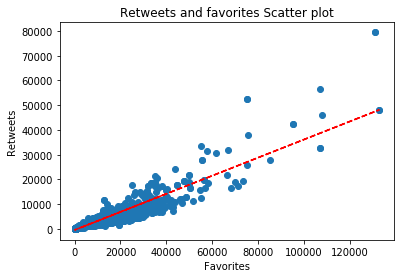

In [61]:
# analyzing the data by poltting the "favorite_count" against "retweet_count" with the trend line
x = df['favorite_count']
y = df['retweet_count']
plt.scatter(x,y)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
model = np.polyfit(x, y, 1)
trend = np.poly1d(model)
plt.plot(x,trend(x),"r--")

In [62]:
df[df.dog_type != 'None'].dog_type.value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_type, dtype: int64

(-1.10178071693225,
 1.1000847976647068,
 -1.1314372038019858,
 1.1023982218193755)

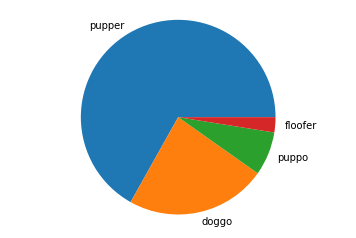

In [63]:
# Piechart illustrating the dog types numbers as a comparison
dog_counts = list(df[df.dog_type != 'None'].dog_type.value_counts())[0:4]
dog_types = df[df.dog_type != 'None'].dog_type.value_counts().index.tolist()[0:4]
fig1, ax1 = plt.subplots()
ax1.pie(dog_counts,  labels = dog_types )
ax1.axis('equal')

In [64]:
df[['favorite_count','retweet_count','rating']]

,favorite_count,retweet_count,rating
0,39467,8853,13.0
1,33819,6514,13.0
2,25461,4328,12.0
3,42908,8964,13.0
4,41048,9774,12.0
5,20562,3261,13.0
6,12041,2158,13.0
7,56848,16716,13.0
8,28226,4429,13.0
9,32467,7711,14.0


In [65]:
df[['favorite_count','retweet_count','rating']].describe()

,favorite_count,retweet_count,rating
count,2311.000000,2311.000000,2311.000000
mean,9234.764171,2917.178711,12.118563
std,12909.085456,5153.877835,38.554451
min,81.000000,16.000000,0.000000
25%,2153.000000,666.000000,10.000000
50%,4257.000000,1415.000000,11.000000
75%,11510.500000,3265.500000,12.000000
max,132810.000000,79515.000000,1776.000000


In [66]:
# getting most liked dog data
best_dog_like  = df.favorite_count.max()
best_dog_like_data = df[df.favorite_count == best_dog_like]
best_dog_like_url = best_dog_like_data.jpg_url.values[0]

In [67]:
# displaying his pic
display(HTML('<img src={} />'.format(best_dog_like_url)))


In [68]:
# getting most retweeted dog data
best_dog_ret  = df.retweet_count.max()
best_dog_ret_data = df[df.retweet_count == best_dog_ret]
best_dog_ret_url = best_dog_ret_data.jpg_url.values[0]

In [69]:
# displaying his pic
display(HTML('<img src={} />'.format(best_dog_ret_url)))


In [70]:
# getting highest rated dog data
best_dog_rating  = df.rating.max()
best_dog_data = df[df.rating == best_dog_rating]
best_dog_url = best_dog_data.jpg_url.values[0]

In [71]:
# displaying his pic
display(HTML('<img src={} />'.format(best_dog_url)))


Text(0,0.5,'Count')

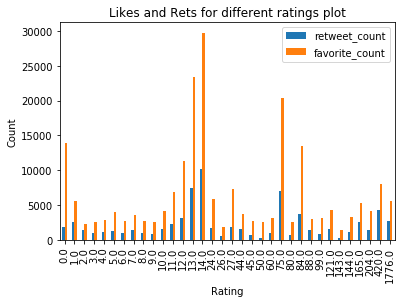

In [72]:
# plotting the likes and retweets regarding the ratings 
df.groupby('rating')['retweet_count','favorite_count'].mean().plot(kind='bar')
plt.title('Likes and Rets for different ratings plot')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0,0.5,'Avarage Rating ')

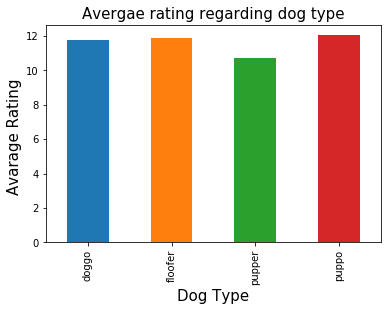

In [73]:
# plotting the average rating regarding the type
df[df['dog_type'] != 'None'].groupby('dog_type')['rating'].mean().plot(kind='bar')
plt.title('Avergae rating regarding dog type', fontsize=15)
plt.xlabel('Dog Type', fontsize=15)
plt.ylabel('Avarage Rating ', fontsize=15)

Text(0,0.5,'Avarage likes ')

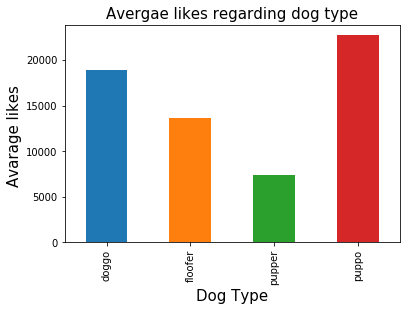

In [74]:
# plotting the average likes regarding the type
df[df['dog_type'] != 'None'].groupby('dog_type')['favorite_count'].mean().plot(kind='bar')
plt.title('Avergae likes regarding dog type', fontsize=15)
plt.xlabel('Dog Type', fontsize=15)
plt.ylabel('Avarage likes ', fontsize=15)

Text(0,0.5,'Avarage Retweets ')

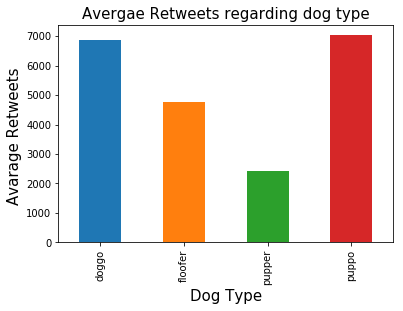

In [75]:
# plotting the average retweeets regarding the type
df[df['dog_type'] != 'None'].groupby('dog_type')['retweet_count'].mean().plot(kind='bar')
plt.title('Avergae Retweets regarding dog type', fontsize=15)
plt.xlabel('Dog Type', fontsize=15)
plt.ylabel('Avarage Retweets ', fontsize=15)